# Assignment Requirements

Complete an Exploratory data analysis for the CHR 2021 dataset. Your analysis should include the following. For each of the following sections, please provide a narritive of your approach, reasoning for your treatment of the data and insights or conclusions that you have reached.

Define a few questions that you wish to discover about your dataset to guide your EDA effort.
   1. Describe the data within the dataset.
       - Data types: Categorical vs Continuous variables
       - Statistical summary, etc.
   2. Data Cleaning
       - Identify and handle missing values
       - Identify and handle outliers
   3. Feature Selection
       - Graphical visualization of features 
       - Examine the relationships within the dataset - using 2 different methods
       - Reduction of the dimensionality of the dataset
   4. Insights and Findings
       - Describe an insights and/or findings from within the datset.
   5. Bonus: Feature Engineering
       - Create a new feature based for findings.
       
**Important:** Make sure your provide complete and thorough explanations for all of your analysis steps. You need to defend your thought processes and reasoning.

# Deliverables:
Upload your Jupyter Notebook to the corresponding location in WorldClass. Also, you will need to provide a copy of your dataset.

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pylab as plt
%matplotlib inline

Looking at the data in the excel, column names need some modification before loading the dataset. If not, there would be many random 'unname' columns. So, I renamed Imaginary_Min, Imaginary_Avg, Real_Min, and Real_Avg. I also had to remove the following information because it would also create 'unname' columns.


Gender: Male=1, Female=0

Smoking: Non-smoker=1, Ex-smoker=2, Active-smoker=3

# Loading data

In [2]:
# Gender: male=1, Female=2 and Smoking: Non-smoker=1, Ex-smoker=2, Active smoker=3 
data_df = pd.read_csv('C:/Users/Asmita Bamma/Downloads/Exasens.csv')
data_df

,Diagnosis,ID,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72.0,2.0
4,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73.0,3.0
...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0


# 1. Describe the data within the dataset.
Data types: Categorical vs Continuous variables
and Statistical summary, etc.

In [3]:
# First ten data
data_df.head(10)

,Diagnosis,ID,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72.0,2.0
4,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73.0,3.0
5,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76.0,2.0
6,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65.0,2.0
7,COPD,306-3,-327.78,-318.677553,-507.23,-469.024194,1.0,60.0,2.0
8,COPD,307-3,-330.18,-320.617478,-473.73,-467.361854,1.0,76.0,2.0
9,COPD,308,NaN,NaN,NaN,NaN,1.0,77.0,2.0


In [4]:
# Last ten data
data_df.tail(10)

,Diagnosis,ID,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking
391,Infected,I171,NaN,NaN,NaN,NaN,0.0,41.0,2.0
392,Infected,I172,NaN,NaN,NaN,NaN,0.0,25.0,1.0
393,Infected,I173,NaN,NaN,NaN,NaN,1.0,27.0,1.0
394,Infected,I174,NaN,NaN,NaN,NaN,0.0,56.0,3.0
395,Infected,I175,NaN,NaN,NaN,NaN,0.0,46.0,1.0
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0
400,Infected,I180,NaN,NaN,NaN,NaN,0.0,40.0,1.0


Descriptive Statistics

array([[<AxesSubplot:title={'center':'Imaginary_Min'}>,
        <AxesSubplot:title={'center':'Imaginary_Avg'}>,
        <AxesSubplot:title={'center':'Real_Min'}>],
       [<AxesSubplot:title={'center':'Real_Avg'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Smoking'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

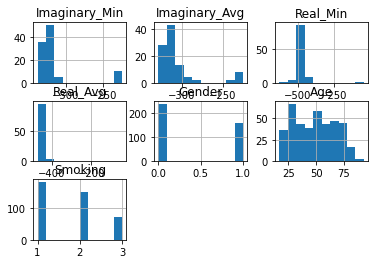

In [5]:
data_df.hist()

There are many missing values for the four columns stated earlier, that is why, their histogram looks empty with less bins.

array([[<AxesSubplot:title={'center':'Smoking'}>]], dtype=object)

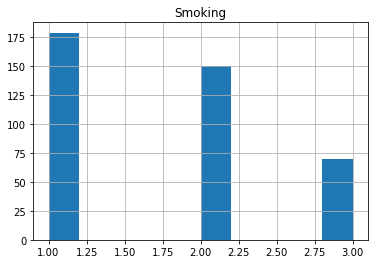

In [6]:
# individual column histogram for better view
data_df.hist(column='Smoking')

In [7]:
# central tendency and dispersion
data_df.describe()


,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking
count,100.000000,100.000000,100.000000,100.000000,399.000000,399.000000,399.000000
mean,-314.941800,-304.779677,-473.002200,-458.701666,0.398496,48.736842,1.726817
std,28.422753,25.834316,49.009819,43.725345,0.490203,18.566962,0.742167
min,-337.350000,-328.280985,-626.860000,-473.928698,0.000000,17.000000,1.000000
25%,-327.780000,-318.476799,-476.120000,-470.036232,0.000000,31.000000,1.000000
50%,-323.000000,-314.327176,-473.730000,-467.136002,0.000000,49.000000,2.000000
75%,-320.610000,-305.072319,-468.950000,-462.804774,1.000000,64.000000,2.000000
max,-225.000000,-225.000000,-44.000000,-44.000000,1.000000,93.000000,3.000000


In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Imaginary_Min,100.0,-314.941800,28.422753,-337.350000,-327.780000,-323.000000,-320.610000,-225.0
Imaginary_Avg,100.0,-304.779677,25.834316,-328.280985,-318.476799,-314.327176,-305.072319,-225.0
Real_Min,100.0,-473.002200,49.009819,-626.860000,-476.120000,-473.730000,-468.950000,-44.0
Real_Avg,100.0,-458.701666,43.725345,-473.928698,-470.036232,-467.136002,-462.804774,-44.0
Gender,399.0,0.398496,0.490203,0.000000,0.000000,0.000000,1.000000,1.0
Age,399.0,48.736842,18.566962,17.000000,31.000000,49.000000,64.000000,93.0
Smoking,399.0,1.726817,0.742167,1.000000,1.000000,2.000000,2.000000,3.0


In [9]:
data_df.shape

(401, 9)

There are altogether 401 rows and 9 columns in this dataset.

<AxesSubplot:>

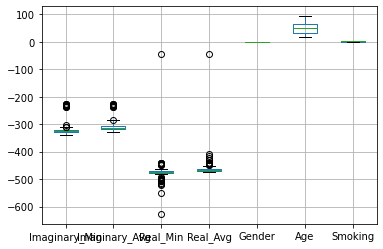

In [10]:
data_df.boxplot()

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diagnosis      399 non-null    object 
 1   ID             399 non-null    object 
 2   Imaginary_Min  100 non-null    float64
 3   Imaginary_Avg  100 non-null    float64
 4   Real_Min       100 non-null    float64
 5   Real_Avg       100 non-null    float64
 6   Gender         399 non-null    float64
 7   Age            399 non-null    float64
 8   Smoking        399 non-null    float64
dtypes: float64(7), object(2)
memory usage: 28.3+ KB


Most data are numeric so it has continous variables. This will make our analysis easier. However, we have many missing values for Imaginary_Min, Imaginary_Avg, Real_Min, and Real_Avg. The non-null count is not even.

# Missing Data

Identify and handle missing values
Identify and handle outliers

In [12]:
data_df[data_df.isnull().values.any(axis=1)]

,Diagnosis,ID,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,COPD,308,NaN,NaN,NaN,NaN,1.0,77.0,2.0
17,COPD,316,NaN,NaN,NaN,NaN,1.0,45.0,2.0
18,COPD,317,NaN,NaN,NaN,NaN,1.0,69.0,2.0
...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0


In [13]:
data_df.isnull().sum()

Diagnosis          2
ID                 2
Imaginary_Min    301
Imaginary_Avg    301
Real_Min         301
Real_Avg         301
Gender             2
Age                2
Smoking            2
dtype: int64

There are only two rows with all the values missing. So, the best approach in this situation would be dropping those rows. 

In [14]:
#dropping first and second row
data_df.drop(data_df.index[[0,1]], inplace=True)

In [15]:
data_df.head(5)

,Diagnosis,ID,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking
2,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72.0,2.0
4,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73.0,3.0
5,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76.0,2.0
6,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65.0,2.0


Here, we can see the first two rows are gone.

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 2 to 400
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diagnosis      399 non-null    object 
 1   ID             399 non-null    object 
 2   Imaginary_Min  100 non-null    float64
 3   Imaginary_Avg  100 non-null    float64
 4   Real_Min       100 non-null    float64
 5   Real_Avg       100 non-null    float64
 6   Gender         399 non-null    float64
 7   Age            399 non-null    float64
 8   Smoking        399 non-null    float64
dtypes: float64(7), object(2)
memory usage: 31.2+ KB


Since four columns Imaginary_Min, Imaginary_Avg, Real_Min, and Real_Avg have more than 50% missing values, we cannot remove missing  rows. Also, we cannot remove these columns because they are the target variables. So, we will find the mean of a column and put that mean value in missing spots for a column. We will do same for all four columns.

In [17]:
# function obtained from github. Retrieved from https://github.com/tubagusibrohim/Exasens-Data-Set-Clustering/blob/main/Exasens_Dataset_Clustering.ipynb
data_df_ready = data_df.copy()
print('mean dari Imaginary_Min:',data_df_ready['Imaginary_Min'].mean())
data_df_ready['Imaginary_Min_imputed_mean'] = data_df_ready['Imaginary_Min'].replace(np.nan, data_df_ready['Imaginary_Min'].mean())
data_df_ready[['Imaginary_Min','Imaginary_Min_imputed_mean']].head(10)

mean dari Imaginary_Min: -314.9418


,Imaginary_Min,Imaginary_Min_imputed_mean
2,-320.61,-320.6100
3,-325.39,-325.3900
4,-323.00,-323.0000
5,-327.78,-327.7800
6,-325.39,-325.3900
7,-327.78,-327.7800
8,-330.18,-330.1800
9,NaN,-314.9418
10,-320.61,-320.6100
11,-315.82,-315.8200


In [18]:
print('mean dari Imaginary_Avg:',data_df_ready['Imaginary_Avg'].mean())
data_df_ready['Imaginary_Avg_imputed_mean'] = data_df_ready['Imaginary_Avg'].replace(np.nan, data_df_ready['Imaginary_Avg'].mean())
data_df_ready[['Imaginary_Avg','Imaginary_Avg_imputed_mean']].head(10)

mean dari Imaginary_Avg: -304.779676745


,Imaginary_Avg,Imaginary_Avg_imputed_mean
2,-300.563531,-300.563531
3,-314.750360,-314.750360
4,-317.436056,-317.436056
5,-317.399670,-317.399670
6,-316.155785,-316.155785
7,-318.677553,-318.677553
8,-320.617478,-320.617478
9,NaN,-304.779677
10,-307.599586,-307.599586
11,-300.104765,-300.104765


In [19]:
print('mean dari Real_Min:',data_df_ready['Real_Min'].mean())
data_df_ready['Real_Min_imputed_mean'] = data_df_ready['Real_Min'].replace(np.nan, data_df_ready['Real_Min'].mean())
data_df_ready[['Real_Min','Real_Min_imputed_mean']].head(10)

mean dari Real_Min: -473.00220000000036


,Real_Min,Real_Min_imputed_mean
2,-495.26,-495.2600
3,-473.73,-473.7300
4,-476.12,-476.1200
5,-473.73,-473.7300
6,-478.52,-478.5200
7,-507.23,-507.2300
8,-473.73,-473.7300
9,NaN,-473.0022
10,-476.12,-476.1200
11,-473.73,-473.7300


In [20]:
print('mean dari Real_Avg:',data_df_ready['Real_Avg'].mean())
data_df_ready['Real_Avg_imputed_mean'] = data_df_ready['Real_Avg'].replace(np.nan, data_df_ready['Real_Avg'].mean())
data_df_ready[['Real_Avg','Real_Avg_imputed_mean']].head(10)

mean dari Real_Avg: -458.70166630299997


,Real_Avg,Real_Avg_imputed_mean
2,-464.171991,-464.171991
3,-469.263140,-469.263140
4,-471.897667,-471.897667
5,-468.856388,-468.856388
6,-472.869783,-472.869783
7,-469.024194,-469.024194
8,-467.361854,-467.361854
9,NaN,-458.701666
10,-470.181633,-470.181633
11,-466.378634,-466.378634


In [21]:
#Filling the missing values with the mean value
data_df_ready['Imaginary_Min'] = data_df_ready['Imaginary_Min_imputed_mean']
data_df_ready['Imaginary_Avg'] = data_df_ready['Imaginary_Avg_imputed_mean']
data_df_ready['Real_Min'] = data_df_ready['Real_Min_imputed_mean']
data_df_ready['Real_Avg'] = data_df_ready['Real_Avg_imputed_mean']

In [22]:
data_df_ready.tail(5)

,Diagnosis,ID,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking,Imaginary_Min_imputed_mean,Imaginary_Avg_imputed_mean,Real_Min_imputed_mean,Real_Avg_imputed_mean
396,Infected,I176,-314.9418,-304.779677,-473.0022,-458.701666,0.0,49.0,2.0,-314.9418,-304.779677,-473.0022,-458.701666
397,Infected,I177,-314.9418,-304.779677,-473.0022,-458.701666,0.0,37.0,1.0,-314.9418,-304.779677,-473.0022,-458.701666
398,Infected,I178,-314.9418,-304.779677,-473.0022,-458.701666,0.0,29.0,1.0,-314.9418,-304.779677,-473.0022,-458.701666
399,Infected,I179,-314.9418,-304.779677,-473.0022,-458.701666,1.0,51.0,1.0,-314.9418,-304.779677,-473.0022,-458.701666
400,Infected,I180,-314.9418,-304.779677,-473.0022,-458.701666,0.0,40.0,1.0,-314.9418,-304.779677,-473.0022,-458.701666


Now, we can clearly see that most missing values are filled with the mean value of their respecting columns.

In [23]:
data_df_ready.isnull().sum()

Diagnosis                     0
ID                            0
Imaginary_Min                 0
Imaginary_Avg                 0
Real_Min                      0
Real_Avg                      0
Gender                        0
Age                           0
Smoking                       0
Imaginary_Min_imputed_mean    0
Imaginary_Avg_imputed_mean    0
Real_Min_imputed_mean         0
Real_Avg_imputed_mean         0
dtype: int64

In [24]:
data_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 2 to 400
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Diagnosis                   399 non-null    object 
 1   ID                          399 non-null    object 
 2   Imaginary_Min               399 non-null    float64
 3   Imaginary_Avg               399 non-null    float64
 4   Real_Min                    399 non-null    float64
 5   Real_Avg                    399 non-null    float64
 6   Gender                      399 non-null    float64
 7   Age                         399 non-null    float64
 8   Smoking                     399 non-null    float64
 9   Imaginary_Min_imputed_mean  399 non-null    float64
 10  Imaginary_Avg_imputed_mean  399 non-null    float64
 11  Real_Min_imputed_mean       399 non-null    float64
 12  Real_Avg_imputed_mean       399 non-null    float64
dtypes: float64(11), object(2)
memory us

Now, our dataframe looks complete with zero null counts and all even non-null counts.

# Feature Selection

- Graphical visualization of features


In [25]:
import seaborn as sns

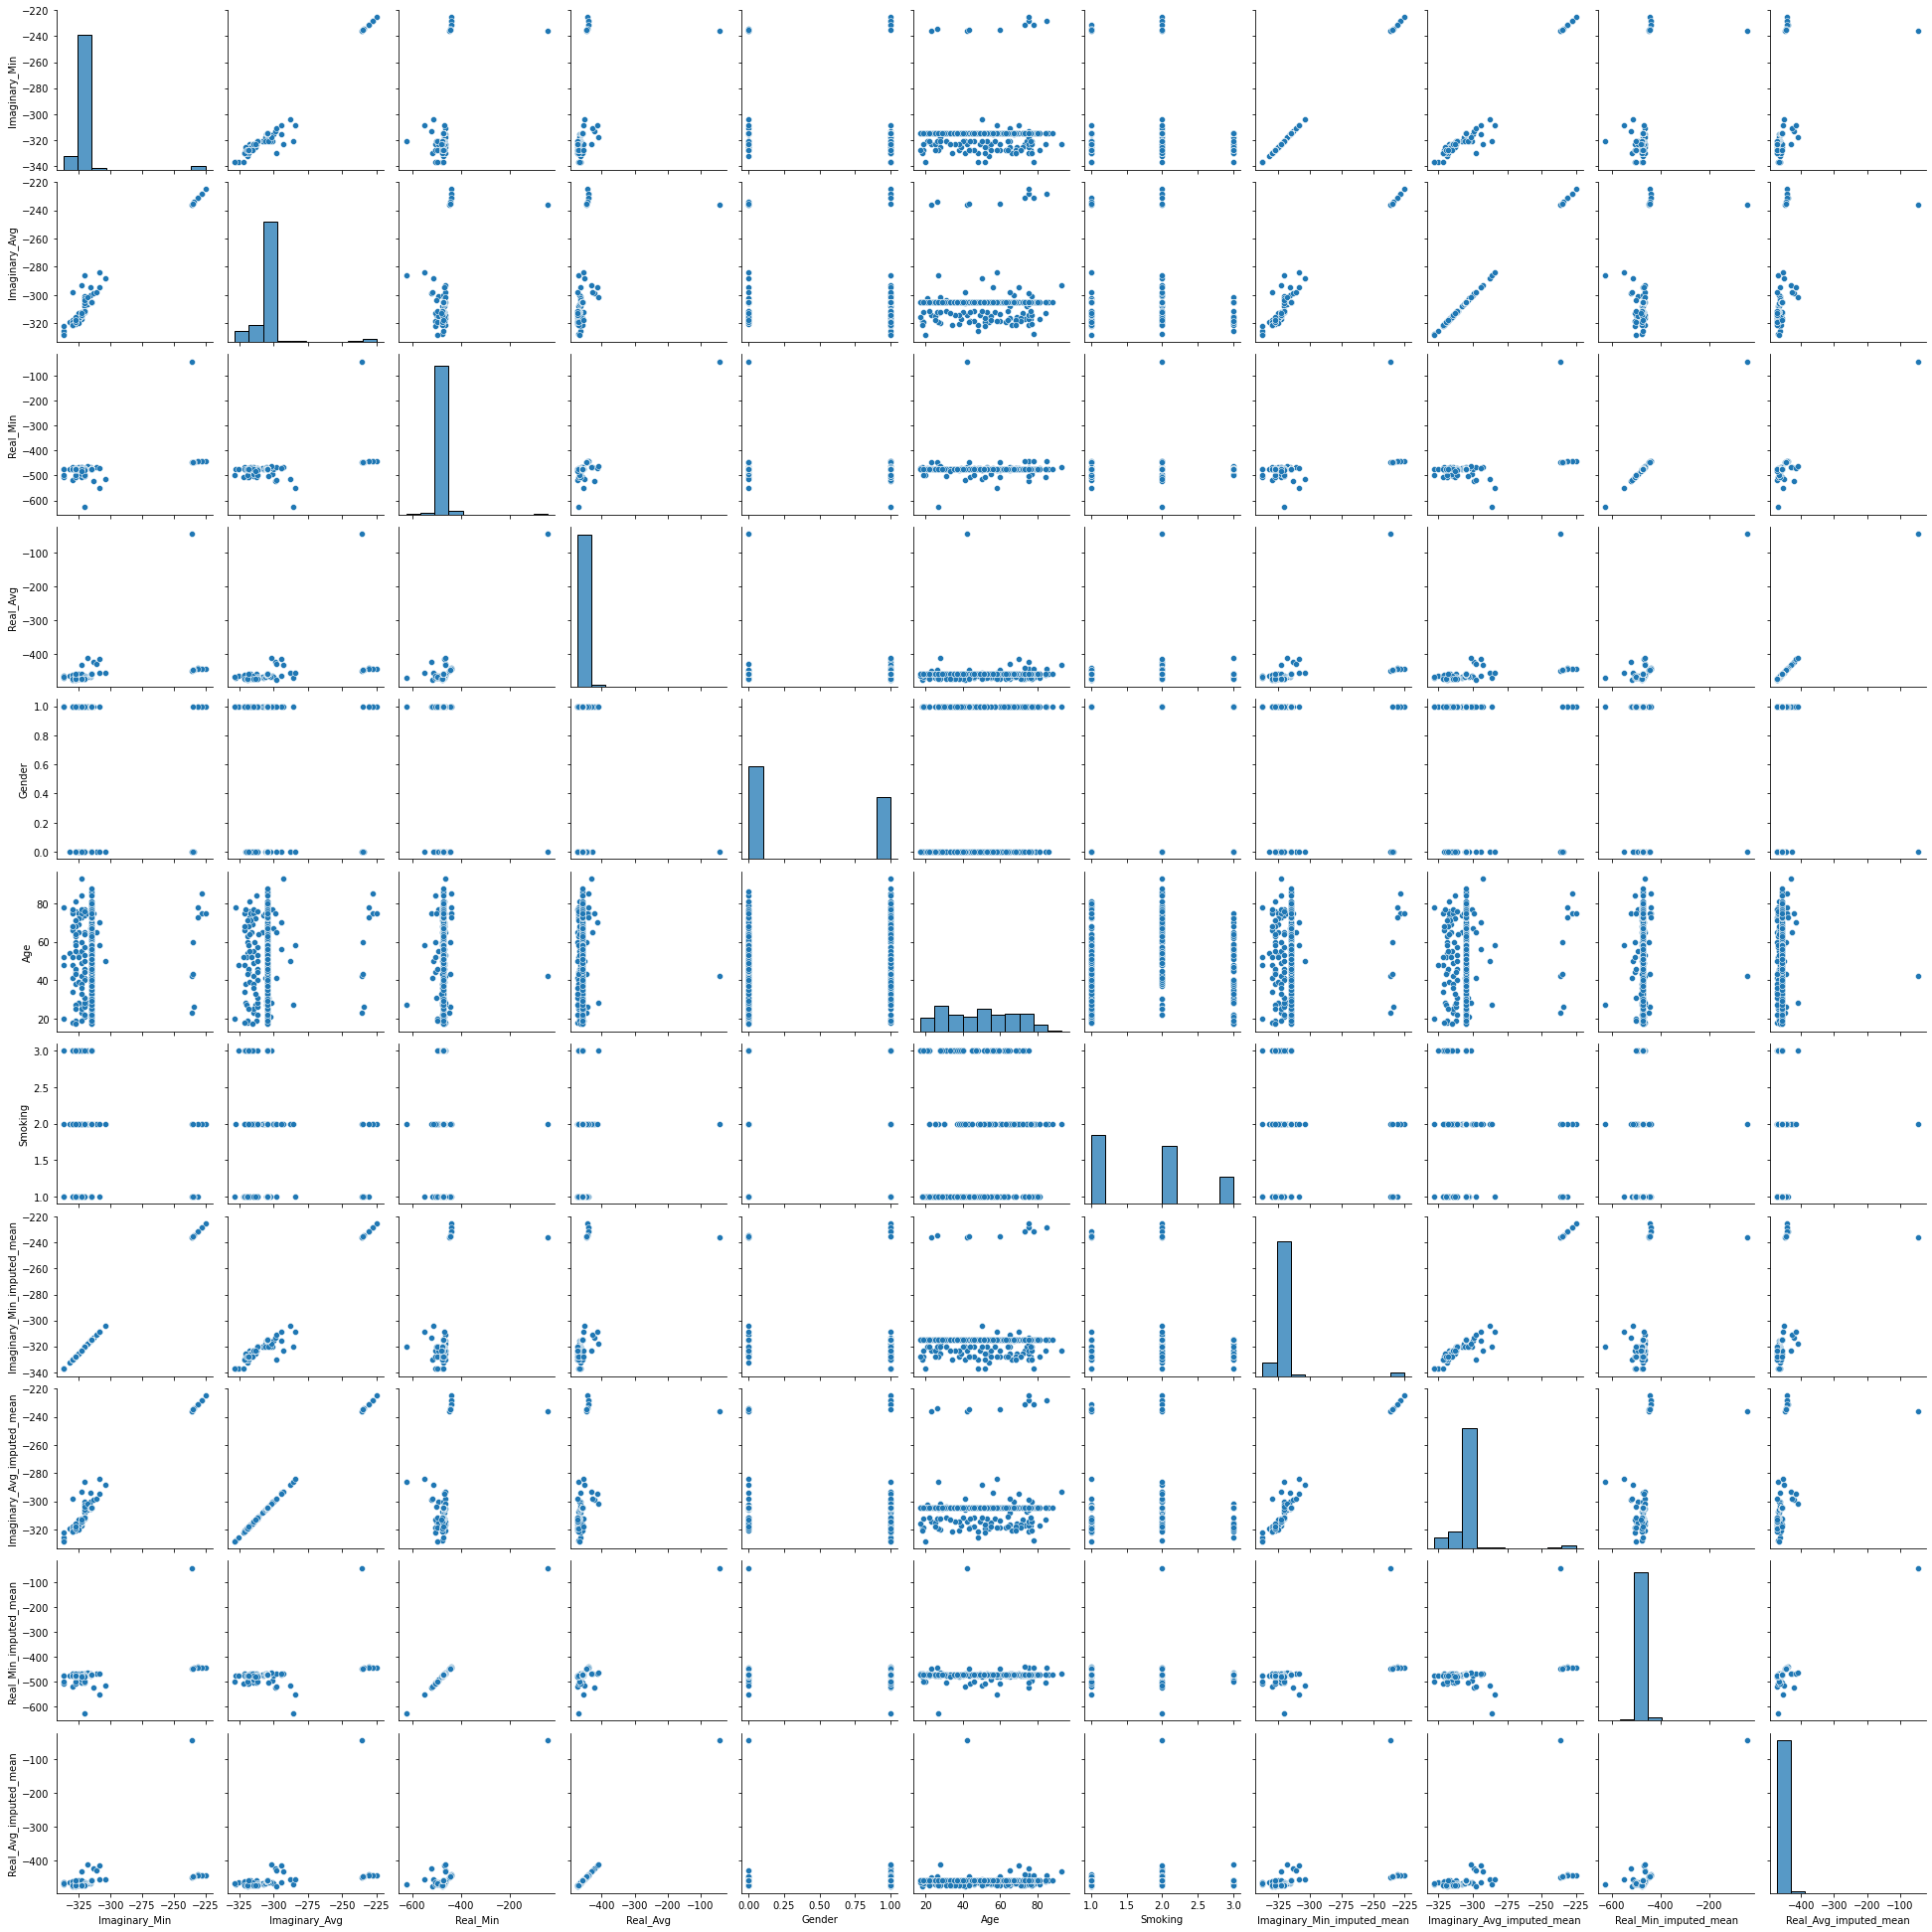

In [26]:
sns.pairplot(data_df_ready)

We can see that there is clear cluster formed on the scatter plot between Imaginary_Min, Imaginary_Avg, Real_Min, Real_Avg, Age, Smoking.

In [27]:
feature = data_df_ready[['Imaginary_Min','Imaginary_Avg','Real_Min','Real_Avg' ,'Age', 'Smoking']]
feature.head()

,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Age,Smoking
2,-320.61,-300.563531,-495.26,-464.171991,77.0,2.0
3,-325.39,-314.750360,-473.73,-469.263140,72.0,2.0
4,-323.00,-317.436056,-476.12,-471.897667,73.0,3.0
5,-327.78,-317.399670,-473.73,-468.856388,76.0,2.0
6,-325.39,-316.155785,-478.52,-472.869783,65.0,2.0


- Examine the relationships within the dataset - using 2 different methods

One of the ways to show their relationship is using the corr() function that does a pearson correlation by default.

In [28]:
# Pandas' pearson correlation
corrmat = data_df_ready.corr()
corrmat

,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking,Imaginary_Min_imputed_mean,Imaginary_Avg_imputed_mean,Real_Min_imputed_mean,Real_Avg_imputed_mean
Imaginary_Min,1.000000,0.980922,0.438120,0.419530,-0.020216,0.058051,-0.038053,1.000000,0.980922,0.438120,0.419530
Imaginary_Avg,0.980922,1.000000,0.375846,0.421075,-0.015668,0.062543,-0.039717,0.980922,1.000000,0.375846,0.421075
Real_Min,0.438120,0.375846,1.000000,0.878389,-0.070783,0.004790,0.021070,0.438120,0.375846,1.000000,0.878389
Real_Avg,0.419530,0.421075,0.878389,1.000000,-0.051241,-0.002184,0.033497,0.419530,0.421075,0.878389,1.000000
Gender,-0.020216,-0.015668,-0.070783,-0.051241,1.000000,0.230465,0.072074,-0.020216,-0.015668,-0.070783,-0.051241
Age,0.058051,0.062543,0.004790,-0.002184,0.230465,1.000000,0.135352,0.058051,0.062543,0.004790,-0.002184
Smoking,-0.038053,-0.039717,0.021070,0.033497,0.072074,0.135352,1.000000,-0.038053,-0.039717,0.021070,0.033497
Imaginary_Min_imputed_mean,1.000000,0.980922,0.438120,0.419530,-0.020216,0.058051,-0.038053,1.000000,0.980922,0.438120,0.419530
Imaginary_Avg_imputed_mean,0.980922,1.000000,0.375846,0.421075,-0.015668,0.062543,-0.039717,0.980922,1.000000,0.375846,0.421075
Real_Min_imputed_mean,0.438120,0.375846,1.000000,0.878389,-0.070783,0.004790,0.021070,0.438120,0.375846,1.000000,0.878389


Another method is to put the correlation matrix into a Seaborn heatmap.

<AxesSubplot:>

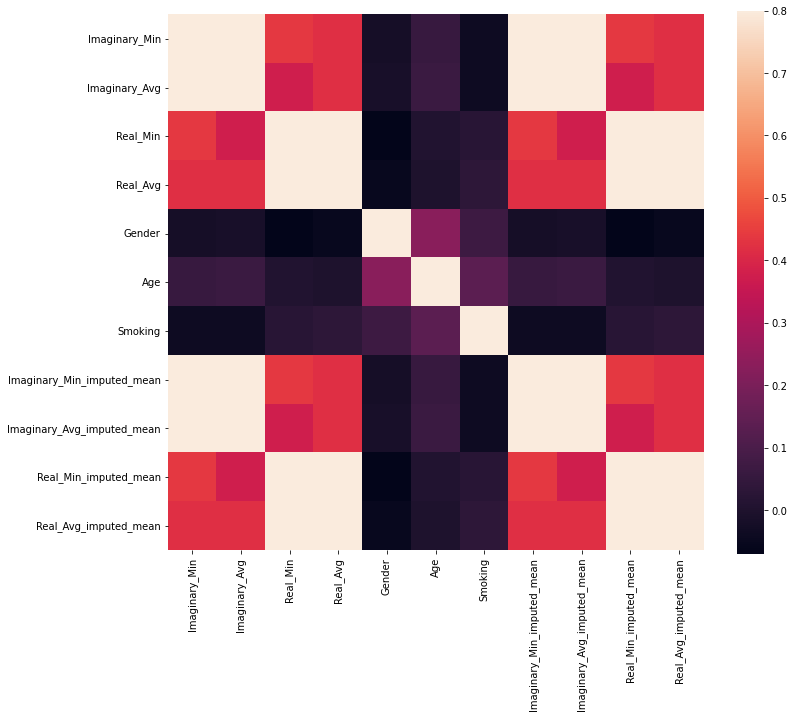

In [29]:
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True)

- Reduction of the dimensionality of the dataset

In [30]:
data_df_ready = data_df_ready.corr()

In [31]:
X = data_df_ready[corrmat.columns[:-1]]
X

,Imaginary_Min,Imaginary_Avg,Real_Min,Real_Avg,Gender,Age,Smoking,Imaginary_Min_imputed_mean,Imaginary_Avg_imputed_mean,Real_Min_imputed_mean
Imaginary_Min,1.000000,0.980922,0.438120,0.419530,-0.020216,0.058051,-0.038053,1.000000,0.980922,0.438120
Imaginary_Avg,0.980922,1.000000,0.375846,0.421075,-0.015668,0.062543,-0.039717,0.980922,1.000000,0.375846
Real_Min,0.438120,0.375846,1.000000,0.878389,-0.070783,0.004790,0.021070,0.438120,0.375846,1.000000
Real_Avg,0.419530,0.421075,0.878389,1.000000,-0.051241,-0.002184,0.033497,0.419530,0.421075,0.878389
Gender,-0.020216,-0.015668,-0.070783,-0.051241,1.000000,0.230465,0.072074,-0.020216,-0.015668,-0.070783
Age,0.058051,0.062543,0.004790,-0.002184,0.230465,1.000000,0.135352,0.058051,0.062543,0.004790
Smoking,-0.038053,-0.039717,0.021070,0.033497,0.072074,0.135352,1.000000,-0.038053,-0.039717,0.021070
Imaginary_Min_imputed_mean,1.000000,0.980922,0.438120,0.419530,-0.020216,0.058051,-0.038053,1.000000,0.980922,0.438120
Imaginary_Avg_imputed_mean,0.980922,1.000000,0.375846,0.421075,-0.015668,0.062543,-0.039717,0.980922,1.000000,0.375846
Real_Min_imputed_mean,0.438120,0.375846,1.000000,0.878389,-0.070783,0.004790,0.021070,0.438120,0.375846,1.000000


In [32]:
y = data_df_ready['Age'].values
y

array([ 0.05805099,  0.06254275,  0.00478994, -0.00218382,  0.2304646 ,
        1.        ,  0.13535154,  0.05805099,  0.06254275,  0.00478994,
       -0.00218382])

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [35]:
max_feature_len = len(max(X.columns, key=len))

In [36]:
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance
# importance = model.feature_importances_
# X.columns

[('Age', 0.43800417878612796),
 ('Smoking', 0.15458484022388397),
 ('Real_Min', 0.08433342207198603),
 ('Real_Avg', 0.0807243498722239),
 ('Gender', 0.06800676614933174),
 ('Real_Min_imputed_mean', 0.053420806321327605),
 ('Imaginary_Min', 0.04382843348442218),
 ('Imaginary_Avg', 0.04069895482345807),
 ('Imaginary_Min_imputed_mean', 0.02394876367321354),
 ('Imaginary_Avg_imputed_mean', 0.012449484594025083)]

You can compare the values and determine what features are important and remove features which are not important enough to use. Our Exasens dataframe has few features and each of them are important. This is how, we can reduce the dimensionality of the dataset by eliminating variables that are not important enough to use.

In [37]:
#Better approach with percentage
max_feature_len = len(max(X.columns, key=len))

In [38]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Age: ....................... 43.80%
Smoking: ................... 15.46%
Real_Min: .................. 8.43%
Real_Avg: .................. 8.07%
Gender: .................... 6.80%
Real_Min_imputed_mean: ..... 5.34%
Imaginary_Min: ............. 4.38%
Imaginary_Avg: ............. 4.07%
Imaginary_Min_imputed_mean:  2.39%
Imaginary_Avg_imputed_mean:  1.24%


# Findings

From our results, 'Age' is the top factor responsible for respiratory disease. It is definitely the target variable in our dataset. Similarly, 'Smoking' and 'Real_avg' are also another important features causing such diseases. From the pairplot, we also know that there is clear cluster formed on the scatter plot between Imaginary_Min, Imaginary_Avg, Real_Min, Real_Avg, Age, Smoking. 

Further Work

In [41]:
data_df_ready.to_csv(r'C:/Users/Asmita Bamma/downloads/cleaned_exasens.csv')